epoch 20,x1 -0.010599,x2 0.000000


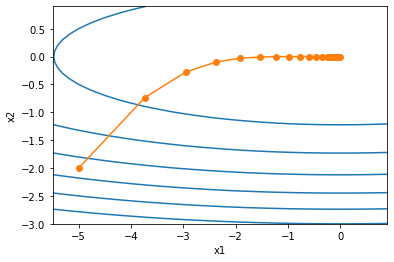

In [1]:
import math
import torch
import matplotlib.pyplot as plt 
import d2lzh as d2l 

def rmsprop_2d(x1,x2,s1,s2):
    g1,g2,eps = 0.2 * x1,4 * x2,1e-6
    s1 = gamma * s1 + (1-gamma) * g1 ** 2
    s2 = gamma * s2 + (1-gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2

    return x1,x2,s1,s2

def f_2d(x1,x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta,gamma = 0.4,0.9
d2l.show_trace_2d(f_2d,d2l.train_2d(rmsprop_2d))

loss: 0.248526, 0.057410 sec per epoch 


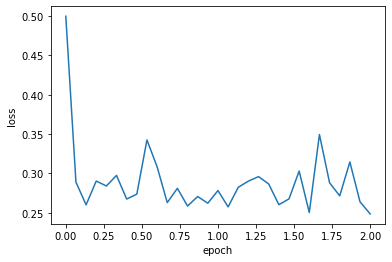

In [2]:
features,labels = d2l.get_data_ch7()

def init_rmsprop_states():
    s_w = torch.zeros((features.shape[1],1),dtype=torch.float32)
    s_b = torch.zeros(1,dtype=torch.float32)

    return (s_w,s_b)

def rmsprop(params,states,hyperparams):
    gamma,eps = hyperparams["lr"],1e-6
    for p,s in zip(params,states):
        s.data = gamma * s.data + (1-gamma) * (p.grad.data)**2
        p.data -= hyperparams["lr"] * p.grad.data / torch.sqrt(s + eps)

d2l.train_ch7(rmsprop,init_rmsprop_states(),{"lr":0.1,"gamma":0.9},features,labels)

loss: 0.248283, 0.049870 sec per epoch 


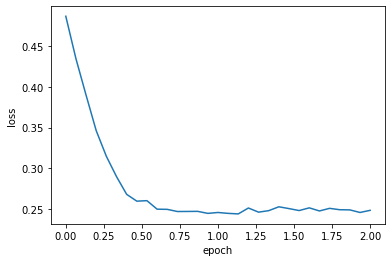

In [3]:
d2l.train_ch7(rmsprop,init_rmsprop_states(),{"lr":0.01,"gamma":0.9},features,labels)

loss: 0.270266, 0.043221 sec per epoch 


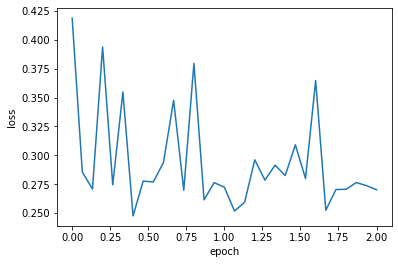

In [4]:
d2l.train_pytorch_ch7(torch.optim.RMSprop,{"lr":0.1,"alpha":0.9},features,labels)